# Trajectory inference on synthetic hematopoiesis data

Data was generated using the notebook : `early_hematopoiesis_unreachable_pEr.ipynb`

In [1]:
import pandas as pd
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
%pwd

'/data/trajectory_reconstruction'

In [4]:
%ls ../synthetic_data/

_tests/
branching_synthetic_core_regulation1_2022-04-11_14h33m15.tsv
metadata_core_regulation1_2022-04-11_14h33m15.tsv


#### Read in data

In [5]:
in_file = '../synthetic_data/branching_synthetic_core_regulation1_2022-04-11_14h33m15.tsv'

adata = st.read(
    file_name=in_file,
    workdir='./stream_branching'
)
df = pd.read_csv(
    in_file, sep="\t", index_col=0, header=0
)
df.head(10)

Saving results in: ./stream_branching


,common_obs0,common_obs1,common_obs2,common_obs3,common_obs4,common_obs5,common_obs6,common_obs7,common_obs8,common_obs9,...,attractor_fixed_point_2_obs4390,attractor_fixed_point_2_obs4391,attractor_fixed_point_2_obs4392,attractor_fixed_point_2_obs4393,attractor_fixed_point_2_obs4394,attractor_fixed_point_2_obs4395,attractor_fixed_point_2_obs4396,attractor_fixed_point_2_obs4397,attractor_fixed_point_2_obs4398,attractor_fixed_point_2_obs4399
G1,3.892874,1.248786,3.057174,0.836229,1.937875,4.492096,1.563765,3.994645,1.160276,5.187002,...,2.077600,1.789019,4.182907,2.992059,2.243540,4.650701,2.605614,3.209162,2.494145,2.334431
G2,2.827419,0.635362,4.433269,3.739484,0.197981,4.238321,2.607564,4.049231,1.823819,2.416939,...,3.602162,1.716577,2.587732,2.284299,2.386520,3.736008,3.134321,2.724281,2.619100,1.968669
G3,1.273664,0.000000,2.263485,3.175067,2.125259,0.552207,2.010461,1.636116,4.351696,0.087117,...,1.039105,0.769690,1.589108,2.994284,2.054390,4.271662,3.431339,3.674514,1.492480,3.784382
G4,3.724108,2.481673,2.307164,3.427367,4.728801,1.657739,5.357338,2.450891,1.894859,3.808074,...,8.915958,8.899305,6.500075,10.151316,9.473373,7.500497,7.633551,11.446466,8.473084,5.587235
G5,1.328451,2.954907,2.574745,2.953074,2.002604,2.864173,1.175434,2.706111,2.098331,3.416935,...,2.221171,4.990197,4.810921,0.772228,3.908714,5.882300,2.884395,2.911736,1.727455,4.025761
G6,3.069076,3.526111,3.080573,2.725792,1.096830,1.458825,2.551404,2.389929,1.438519,3.180785,...,6.474499,6.435793,7.852978,8.406915,9.484400,8.705869,8.399379,8.605858,8.141317,7.018140
TF1,1.344202,3.858446,0.000000,0.711286,1.468082,5.016031,0.000000,0.098573,0.193779,1.658895,...,0.567493,1.649693,4.074606,0.205430,1.330159,1.617775,0.000000,1.864168,0.000000,2.025398
TF2,2.815861,2.953641,0.599650,2.666098,2.691713,3.646377,1.833478,0.426255,0.753735,2.557053,...,7.652305,4.214809,6.902455,6.908301,8.360293,7.419217,7.842401,6.664908,8.476187,6.692867
TF3,1.945071,1.037248,2.027147,3.068041,3.578462,5.758204,4.401871,1.380926,3.082050,2.096344,...,5.897506,7.607615,9.120221,9.623741,6.280868,7.947039,6.254197,9.247066,8.461212,6.731893
TF4,4.488231,1.003793,1.159408,2.554232,1.767284,2.364297,1.677254,2.297777,4.277515,2.651884,...,8.264811,4.525599,8.715728,7.156767,9.063620,7.786451,8.811845,6.688005,5.902596,8.482901


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [6]:
adata

AnnData object with n_obs × n_vars = 4400 × 12 
    uns: 'workdir'

#### Read in metadata

In [7]:
st.add_metadata(
    adata, 
    file_name='../synthetic_data/metadata_core_regulation1_2022-04-11_14h33m15.tsv'
)
adata.obs.head()

,label,label_color
common_obs0,common,#776547
common_obs1,common,#776547
common_obs2,common,#776547
common_obs3,common,#776547
common_obs4,common,#776547


In [8]:
adata.obs.label.value_counts()

common                     1200
branch_fixed_point_1       1200
branch_fixed_point_2        800
split                       400
attractor_fixed_point_1     400
attractor_fixed_point_2     400
Name: label, dtype: int64

#### Calculate QC

In [9]:
st.cal_qc(adata,assay='rna')

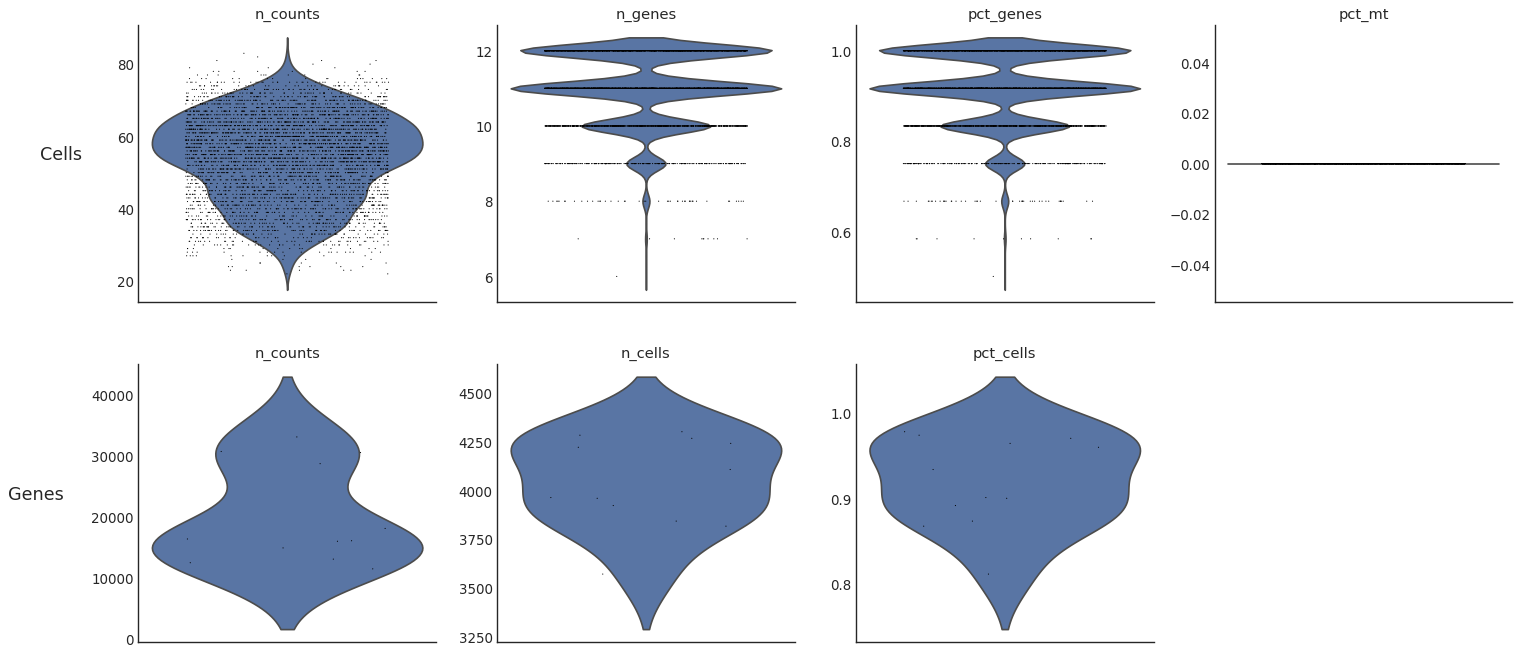

In [10]:
st.plot_qc(adata,jitter=0.3,)

In [11]:
st.filter_cells(adata,min_n_features= 3)
st.filter_features(adata,min_n_cells = 300)

filter cells based on min_n_features
after filtering out low-quality cells: 
4400 cells, 12 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
4400 cells, 12 genes


Commented out because our simulated data is already lib_size normalised and log2 transformed
```python
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
```

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

12 variable genes are selected


Index(['TF2', 'G6', 'TF3', 'TF4', 'G3', 'TF1', 'G1', 'G2', 'TF5', 'G4', 'TF6',
       'G5'],
      dtype='object')

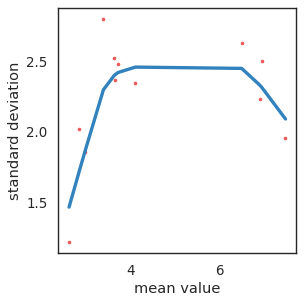

In [12]:
st.select_variable_genes(adata,loess_frac=0.7,n_genes=15)
adata.uns["var_genes"]

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [13]:
st.dimension_reduction(
    adata,
    method='se',
    feature='var_genes',
    n_components=2,
    n_neighbors=15,
    n_jobs=12
)

feature var_genes is being used ...
12 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

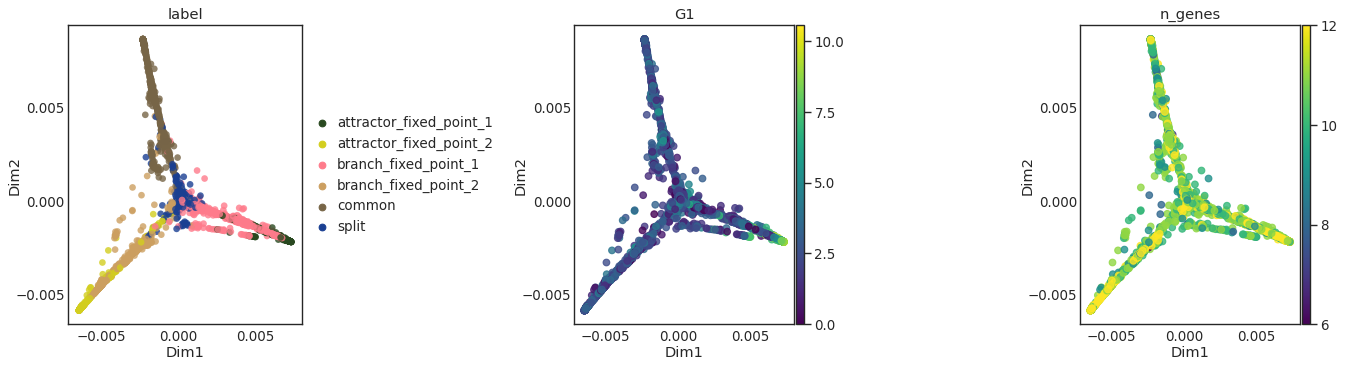

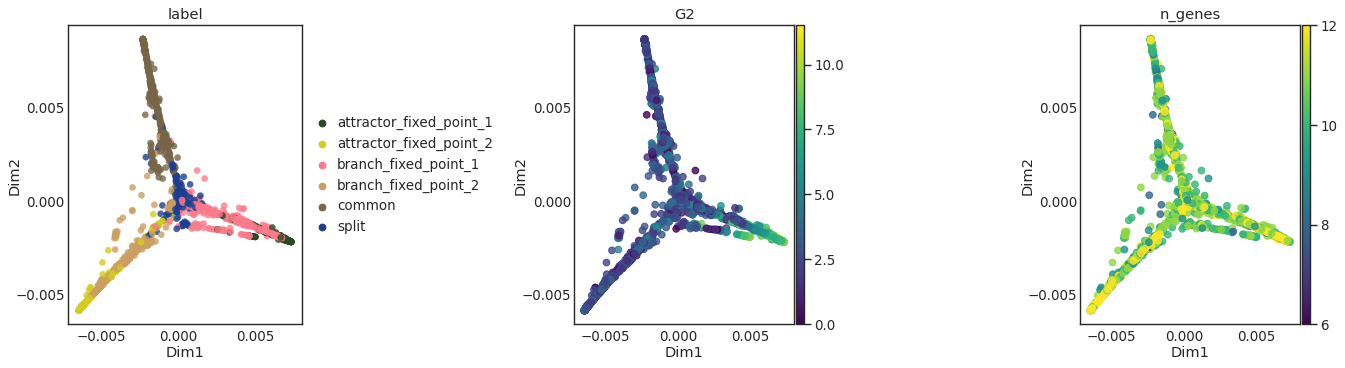

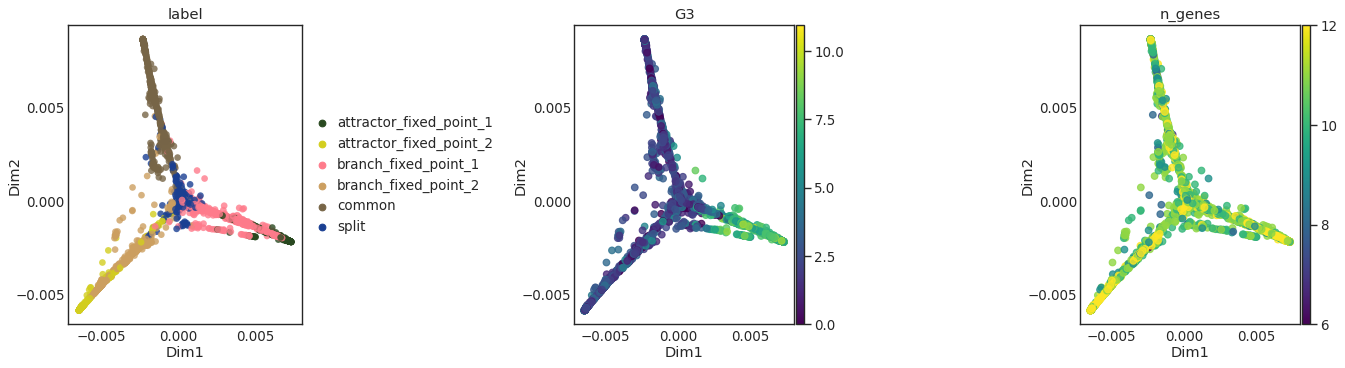

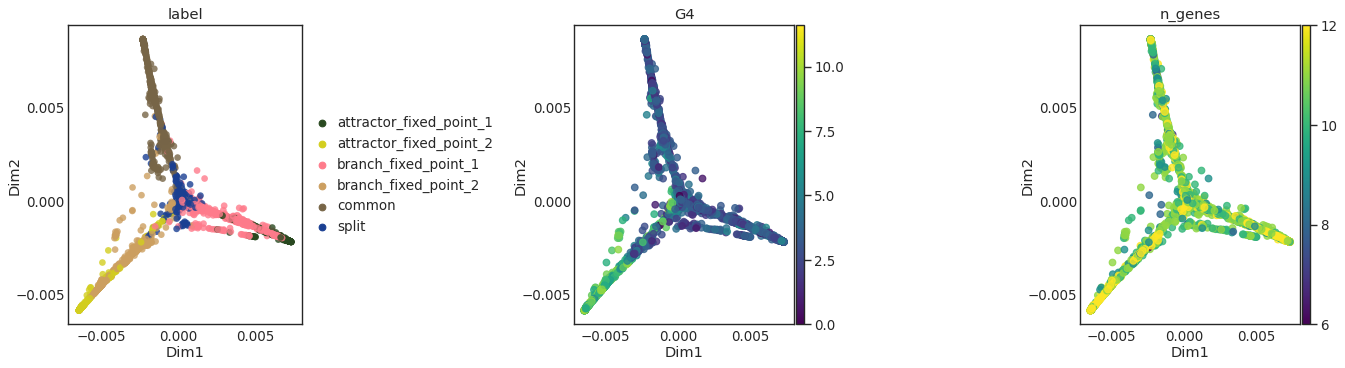

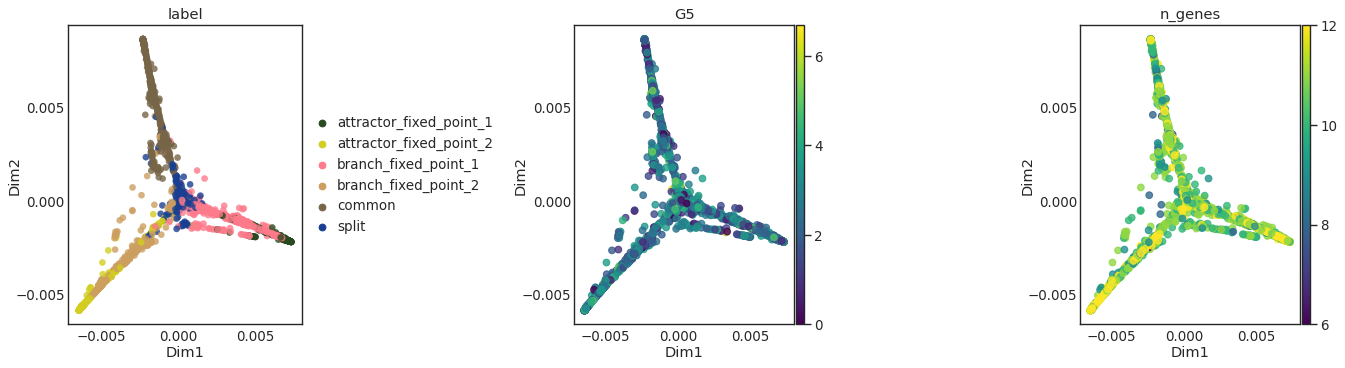

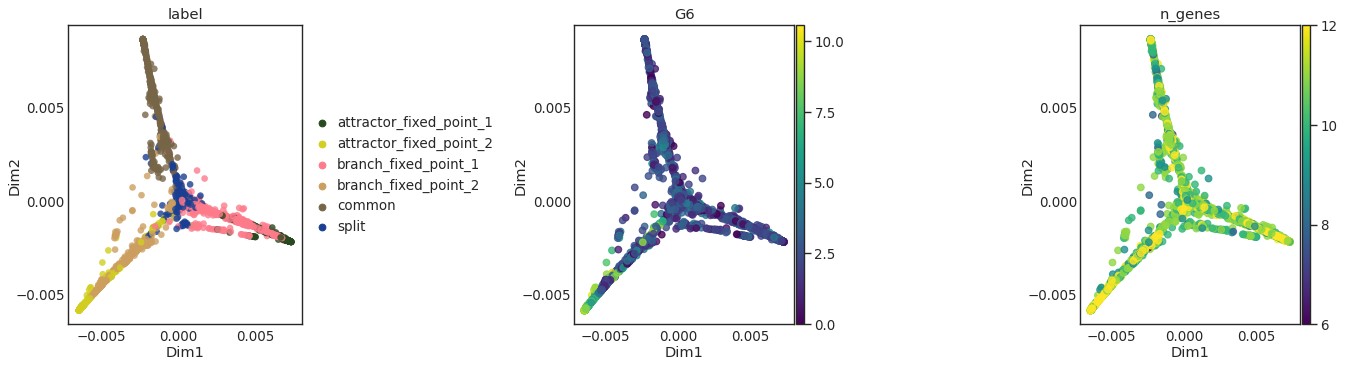

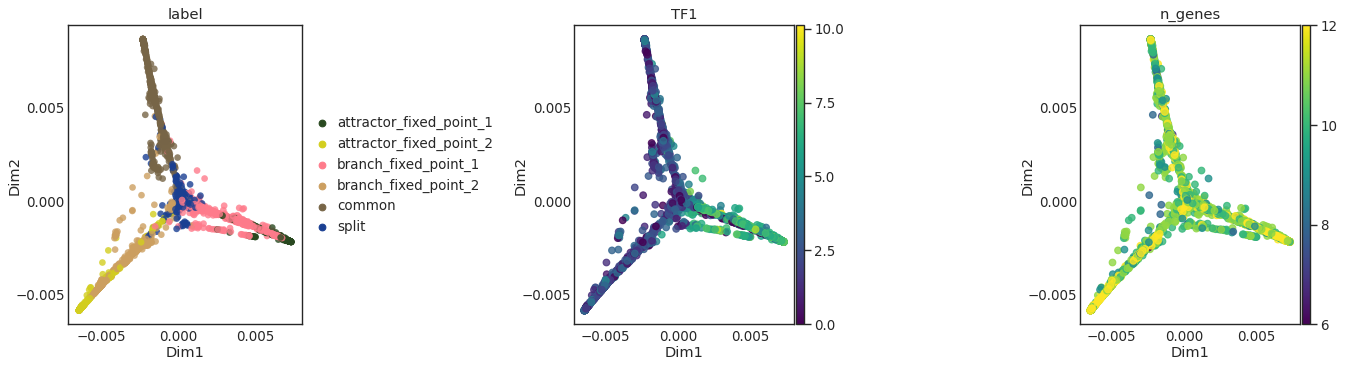

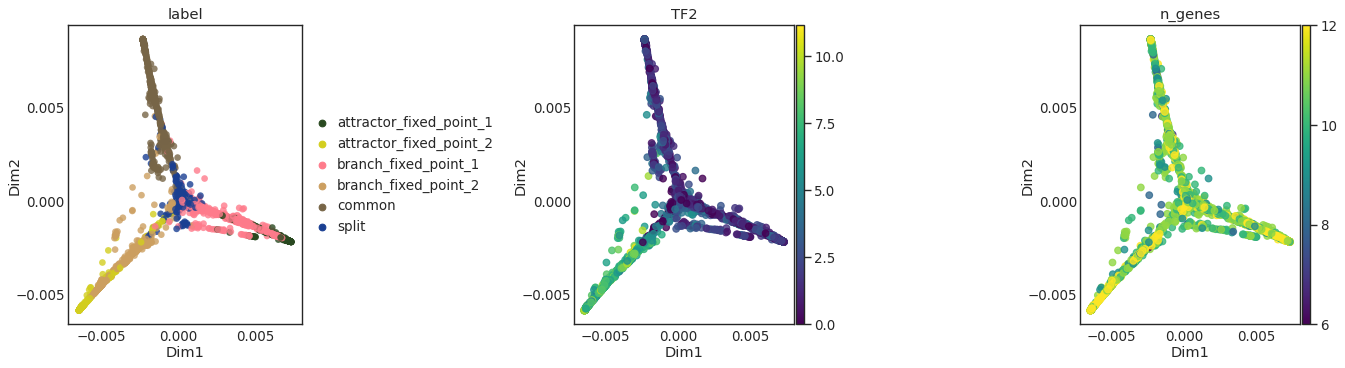

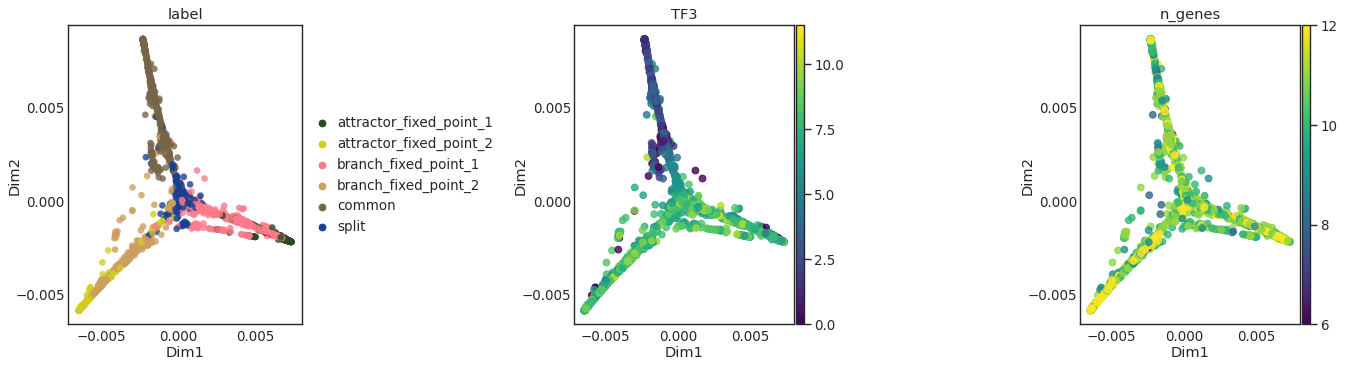

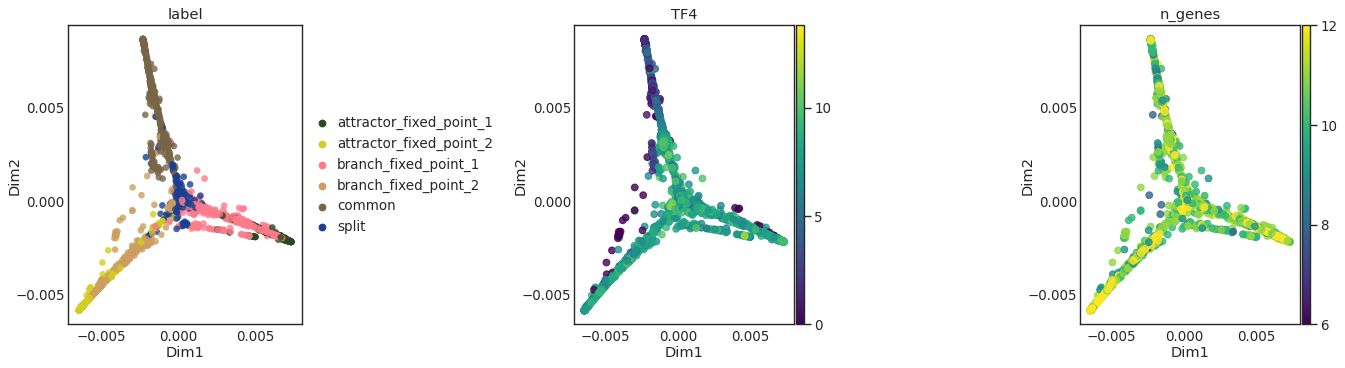

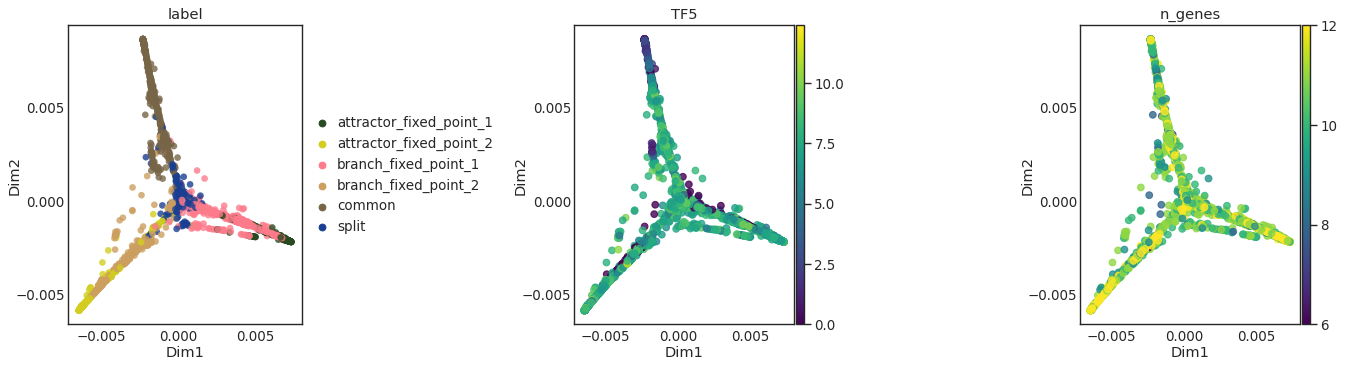

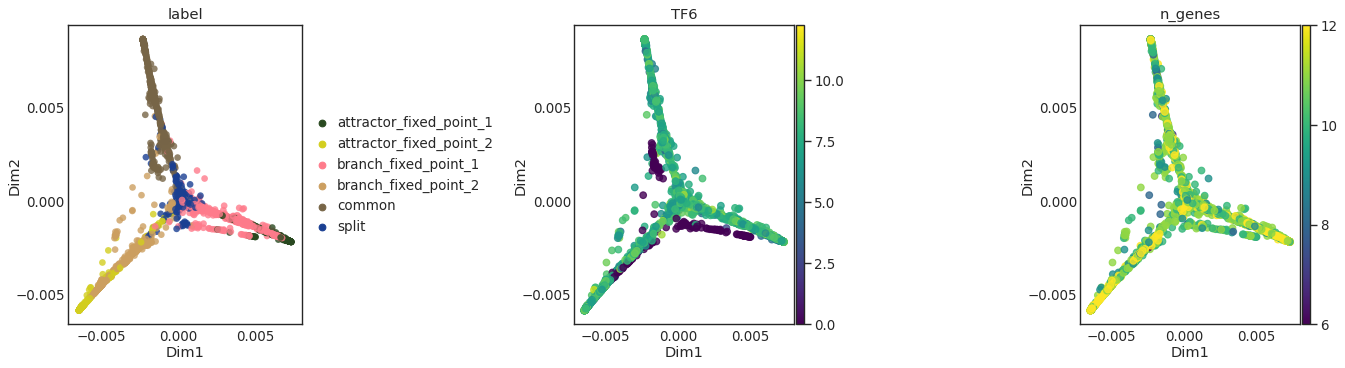

In [14]:
for gene in df.index:
    st.plot_dimension_reduction(adata,color=['label', gene, 'n_genes'],
                            n_components=2,show_graph=False,show_text=False)

#### Trajectory inference

In [16]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


In [17]:
df.head()

,common_obs0,common_obs1,common_obs2,common_obs3,common_obs4,common_obs5,common_obs6,common_obs7,common_obs8,common_obs9,...,attractor_fixed_point_2_obs4390,attractor_fixed_point_2_obs4391,attractor_fixed_point_2_obs4392,attractor_fixed_point_2_obs4393,attractor_fixed_point_2_obs4394,attractor_fixed_point_2_obs4395,attractor_fixed_point_2_obs4396,attractor_fixed_point_2_obs4397,attractor_fixed_point_2_obs4398,attractor_fixed_point_2_obs4399
G1,3.892874,1.248786,3.057174,0.836229,1.937875,4.492096,1.563765,3.994645,1.160276,5.187002,...,2.077600,1.789019,4.182907,2.992059,2.243540,4.650701,2.605614,3.209162,2.494145,2.334431
G2,2.827419,0.635362,4.433269,3.739484,0.197981,4.238321,2.607564,4.049231,1.823819,2.416939,...,3.602162,1.716577,2.587732,2.284299,2.386520,3.736008,3.134321,2.724281,2.619100,1.968669
G3,1.273664,0.000000,2.263485,3.175067,2.125259,0.552207,2.010461,1.636116,4.351696,0.087117,...,1.039105,0.769690,1.589108,2.994284,2.054390,4.271662,3.431339,3.674514,1.492480,3.784382
G4,3.724108,2.481673,2.307164,3.427367,4.728801,1.657739,5.357338,2.450891,1.894859,3.808074,...,8.915958,8.899305,6.500075,10.151316,9.473373,7.500497,7.633551,11.446466,8.473084,5.587235
G5,1.328451,2.954907,2.574745,2.953074,2.002604,2.864173,1.175434,2.706111,2.098331,3.416935,...,2.221171,4.990197,4.810921,0.772228,3.908714,5.882300,2.884395,2.911736,1.727455,4.025761


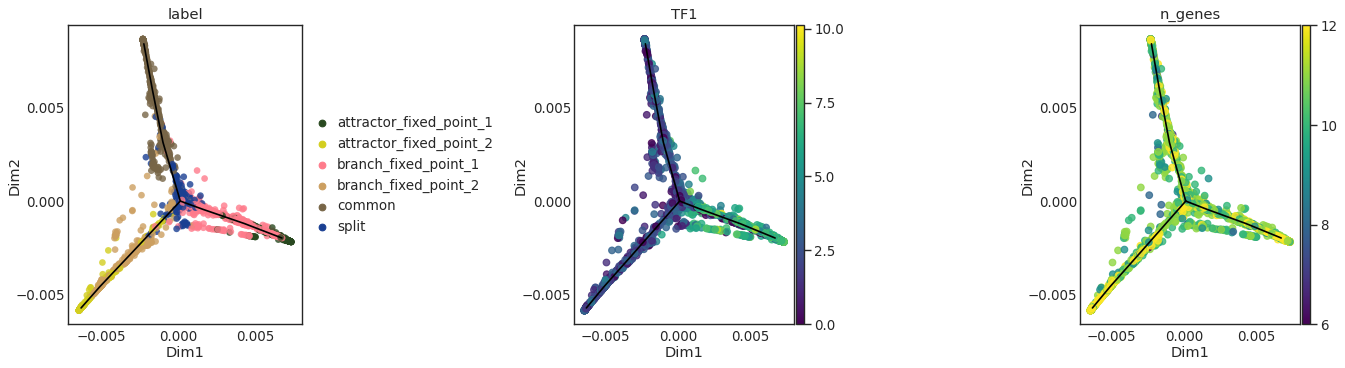

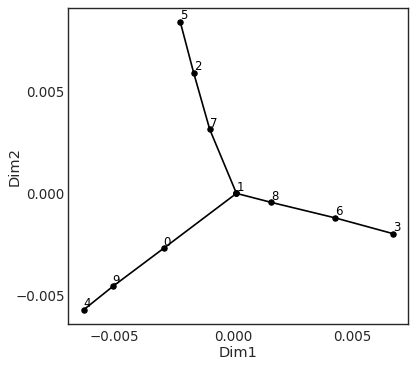

In [18]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [19]:
st.elastic_principal_graph(adata,epg_alpha=0.07,epg_mu=0.07,epg_lambda=0.03)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4400 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
4.666e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
7.948e-08
	
6.329e-08
	
0.9975
	
0.998
	
3.592e-07
	
2.796e-08
	
1.398e-06
	
6.99e-05
	
0


34.123 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


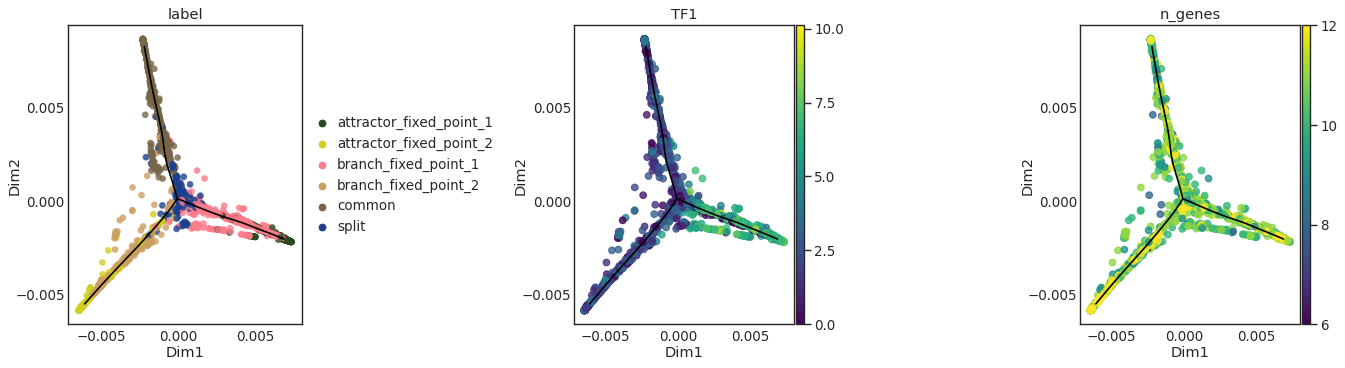

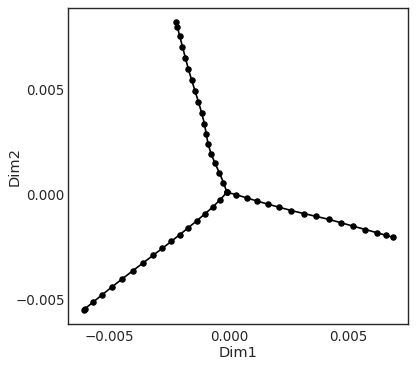

In [20]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


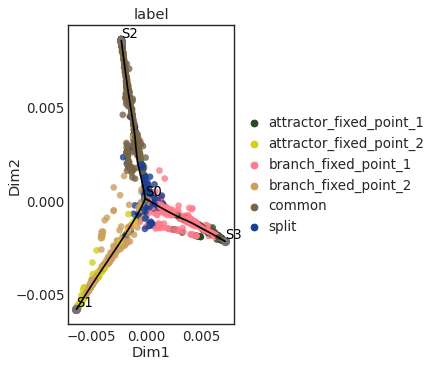

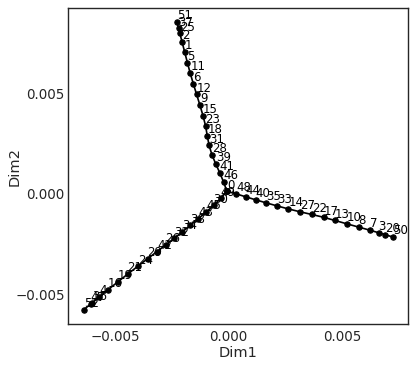

In [21]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

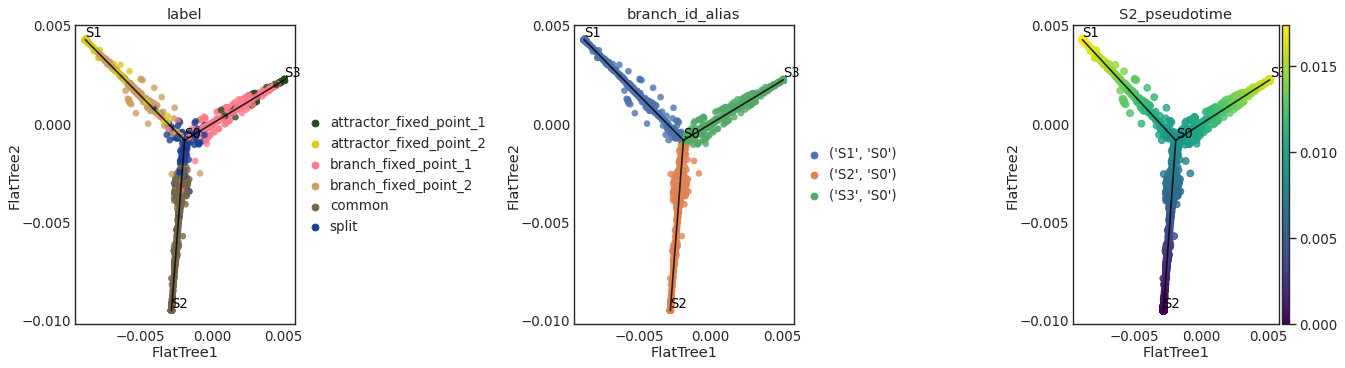

In [22]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

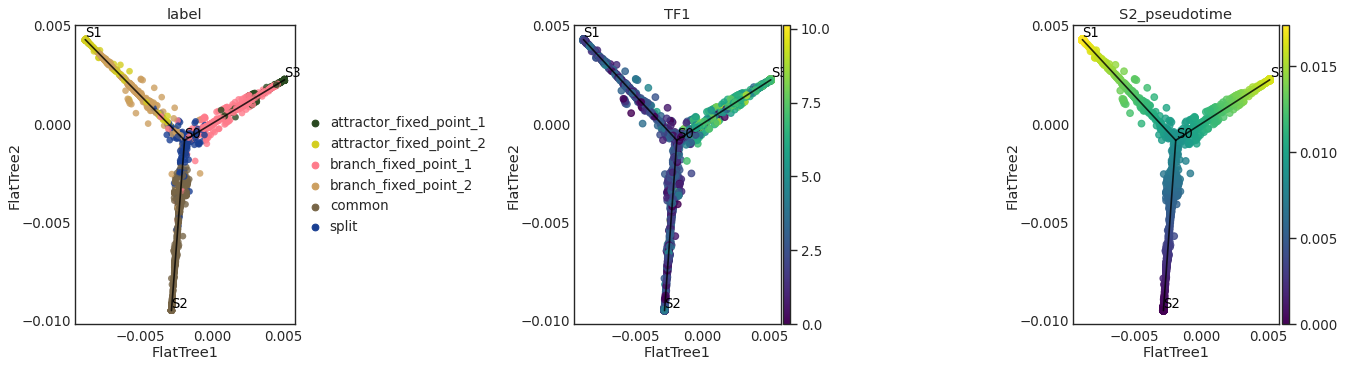

In [23]:
st.plot_flat_tree(adata,color=['label','TF1','S2_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

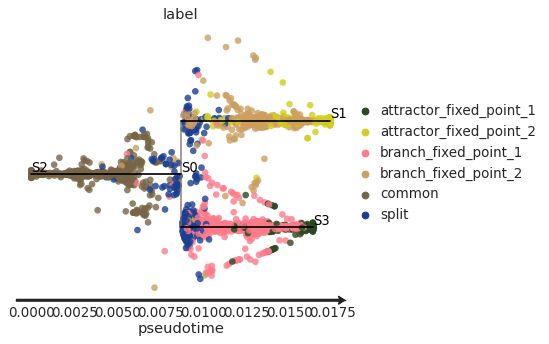

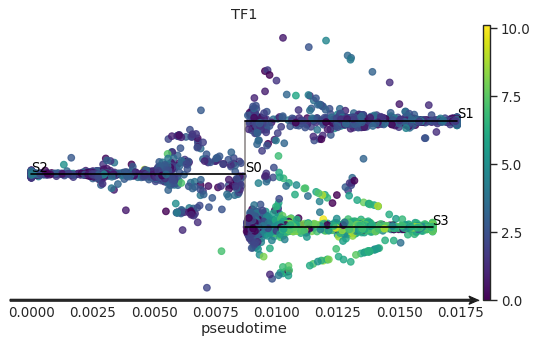

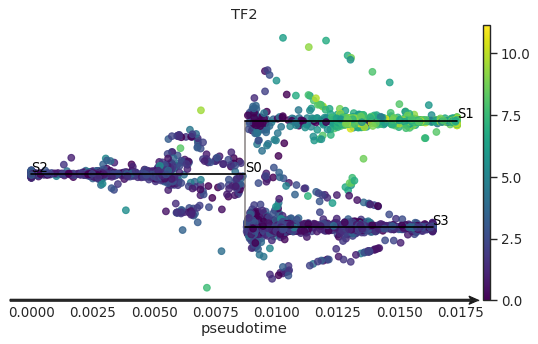

In [24]:
st.plot_stream_sc(adata,root='S2',color=['label','TF1', 'TF2'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

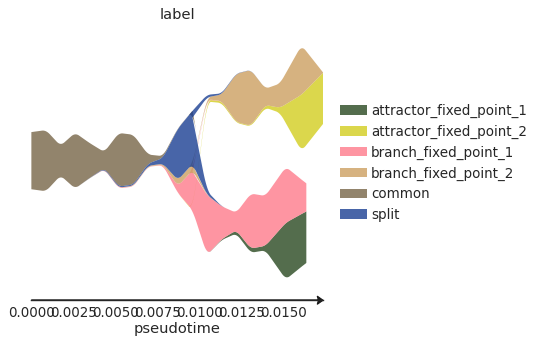

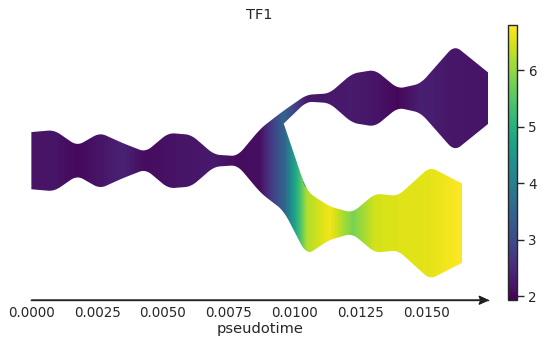

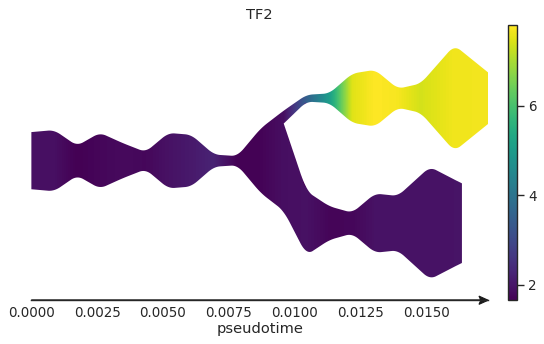

In [25]:
st.plot_stream(adata,root='S2',color=['label','TF1', 'TF2'])

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

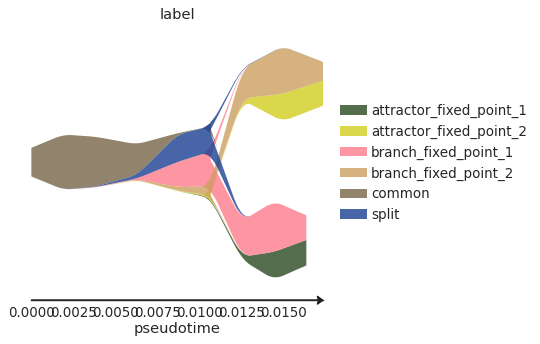

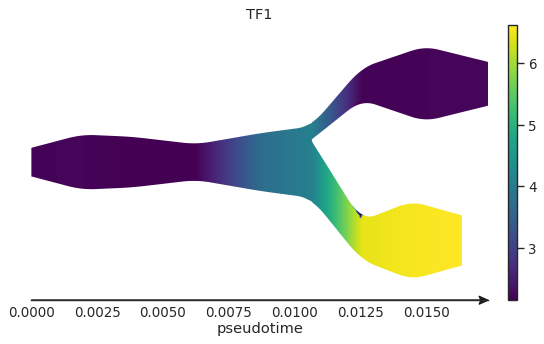

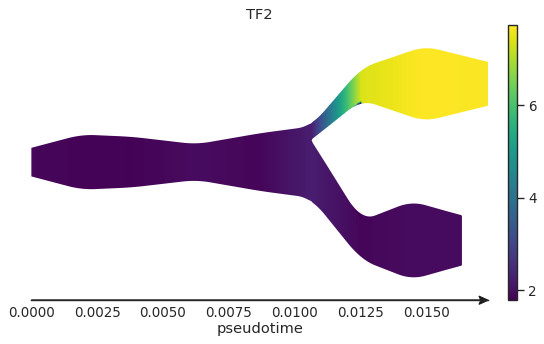

In [26]:
st.plot_stream(adata,root='S2',color=['label', 'TF1', 'TF2'],dist_scale=0.5,factor_num_win=1.5,preference=['S0'])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [27]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S2',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
12 markers are being scanned ...


In [28]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S2S0_pvalue,S0S1_pvalue,S0S3_pvalue
TF2,1.41421,2289.56,0,0,1,0
TF1,1.41421,1863.6,0,0,0,1
TF3,-1.41418,2553.6,0,1,0,0
G4,1.41413,1137.02,1.25516e-247,8.914e-208,1,1.90531e-250
TF4,-1.41308,1130.01,4.18636e-246,1,6.89309e-191,4.82694e-257


In [29]:
for _key in adata.uns['leaf_markers'].keys():
    print(_key)
    print(adata.uns['leaf_markers'][_key], end="\n\n")

('S2', 'S0')
      zscore H_statistic      H_pvalue S2S0_pvalue   S0S1_pvalue   S0S3_pvalue
TF3 -1.41418      2553.6             0           1             0             0
TF4 -1.41308     1130.01  4.18636e-246           1  6.89309e-191  4.82694e-257
TF5 -1.41377       262.9   8.16438e-58           1   1.49673e-40     4.265e-53

('S0', 'S1')
      zscore H_statistic      H_pvalue  S2S0_pvalue S0S1_pvalue   S0S3_pvalue
TF2  1.41421     2289.56             0            0           1             0
G4   1.41413     1137.02  1.25516e-247   8.914e-208           1  1.90531e-250
G6   1.41416     312.357   1.48815e-68  5.72108e-52           1   4.99839e-61

('S0', 'S3')
      zscore H_statistic      H_pvalue   S2S0_pvalue   S0S1_pvalue S0S3_pvalue
TF1  1.41421      1863.6             0             0             0           1
G3   1.41414     1099.25  2.00097e-239  6.50136e-200  1.55501e-203           1
G2   1.41403     539.709  6.36475e-118   1.91697e-94   5.06749e-87           1
G1   1.41421   

##### 2) detect transition genes for each branch

In [30]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S2',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [31]:
for _key in adata.uns['transition_markers'].keys():
    print(f"Transition {_key}")
    print(adata.uns['transition_markers'][_key].head(), end="\n\n")

Transition ('S2', 'S0')
         stat     logfc           pval           qval
TF4  0.692919  1.725915  8.956269e-182  3.582507e-181
TF5  0.653384  2.008770  5.396294e-155  1.079259e-154

Transition ('S0', 'S1')
        stat     logfc           pval           qval
G4  0.672597  1.130000  1.467488e-163  4.402463e-163
G6  0.585762  1.511593  9.505415e-115  1.425812e-114

Transition ('S0', 'S3')
         stat     logfc           pval           qval
G2   0.728456  1.593408  9.565261e-314  3.826104e-313
G3   0.719461  1.590007  1.798597e-302  3.597194e-302
TF1  0.488129  1.425572  3.320502e-114  4.427336e-114
G1   0.448578  1.325079   1.288182e-94   1.288182e-94



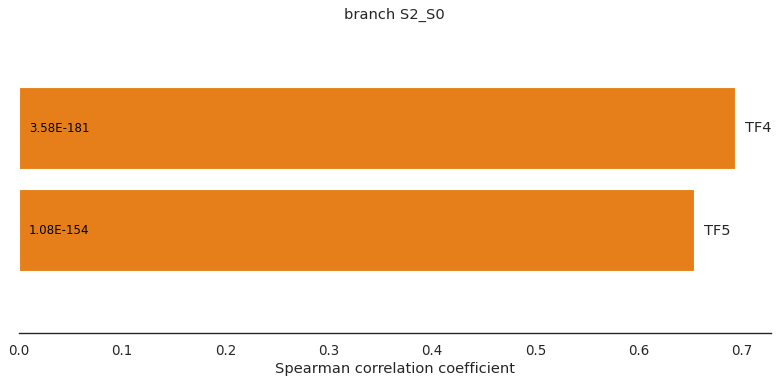

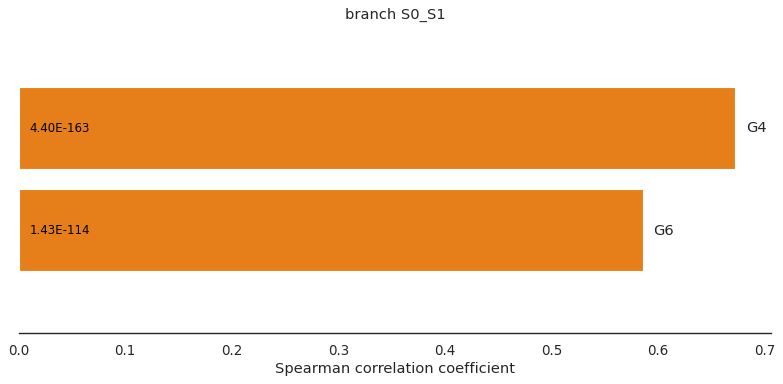

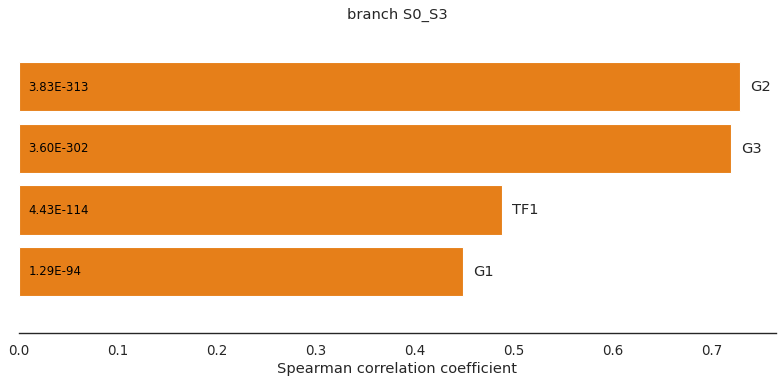

In [32]:
st.plot_transition_markers(adata,fig_size=(10,5))

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [33]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S2',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [34]:
for _key in adata.uns['de_markers_greater'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_greater"][_key], end="\n\n")

Differential expression between branches ('S2', 'S0') and ('S0', 'S1') are :
Empty DataFrame
Columns: [z_score, U, logfc, mean_up, mean_down, pval, qval]
Index: []

Differential expression between branches ('S2', 'S0') and ('S0', 'S3') are :
Empty DataFrame
Columns: [z_score, U, logfc, mean_up, mean_down, pval, qval]
Index: []

Differential expression between branches ('S0', 'S1') and ('S0', 'S3') are :
       z_score          U     logfc   mean_up  mean_down           pval  \
TF2  43.981087  2261508.0  1.915908  0.811717   0.214512   0.000000e+00   
G4   31.052073  1941565.0  1.049091  0.704212   0.339962  1.070328e-211   
G6   16.190237  1573704.0  0.785089  0.504619   0.292626   5.912028e-59   

              qval  
TF2   0.000000e+00  
G4   2.497432e-211  
G6    6.897366e-59  



In [35]:
for _key in adata.uns['de_markers_less'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_less"][_key], end="\n\n")

Differential expression between branches ('S2', 'S0') and ('S0', 'S1') are :
       z_score         U     logfc   mean_up  mean_down           pval  \
TF3 -42.038179   22939.0  1.441086  0.301556   0.820209   0.000000e+00   
TF2 -40.046312   59167.5  1.915536  0.214568   0.811717   0.000000e+00   
G4  -28.138785  274201.0  1.030426  0.344398   0.704212  3.289598e-174   
TF4 -27.097439  292861.0  0.799760  0.452042   0.787504  1.056289e-161   
G6  -14.868861  513851.5  0.795284  0.290562   0.504619   5.252044e-50   
TF5 -13.120952  545355.0  0.356205  0.600884   0.769380   2.498684e-39   

              qval  
TF3   0.000000e+00  
TF2   0.000000e+00  
G4   6.579196e-174  
TF4  1.584433e-161  
G6    6.302453e-50  
TF5   2.498684e-39  

Differential expression between branches ('S2', 'S0') and ('S0', 'S3') are :
       z_score         U     logfc   mean_up  mean_down           pval  \
TF3 -46.385957   33730.0  1.448718  0.301556   0.824572   0.000000e+00   
TF1 -36.166438  291141.0  1.364

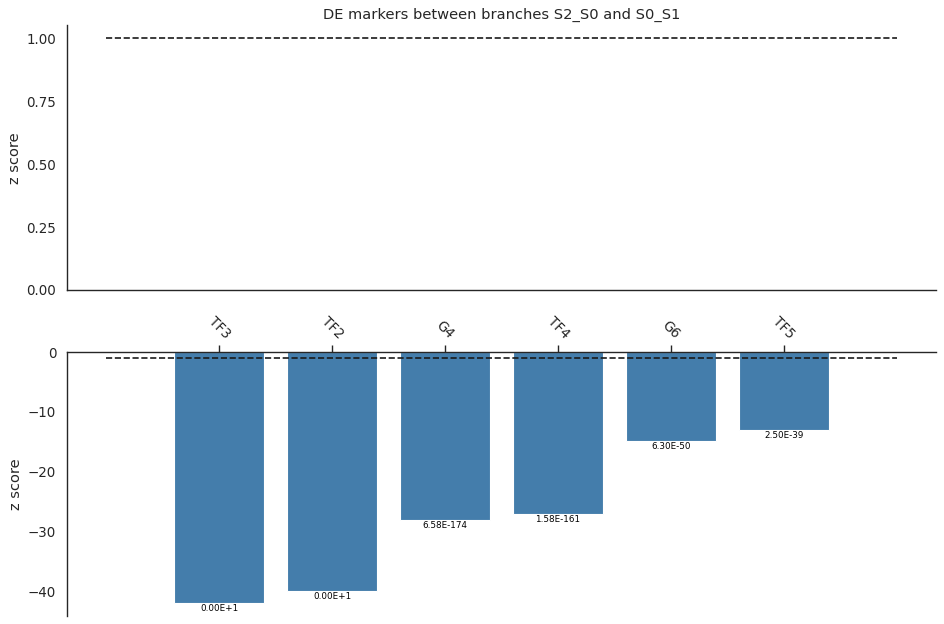

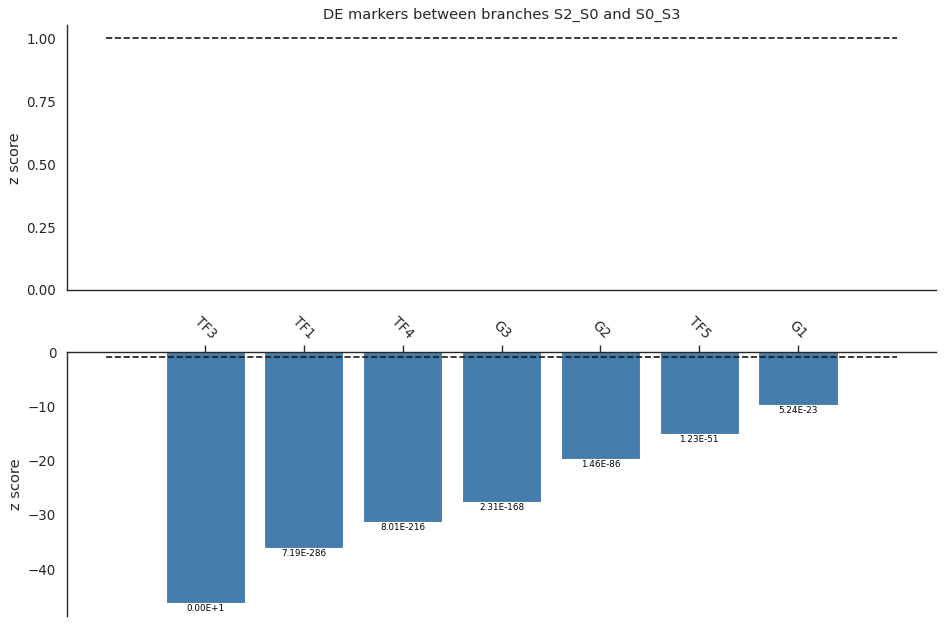

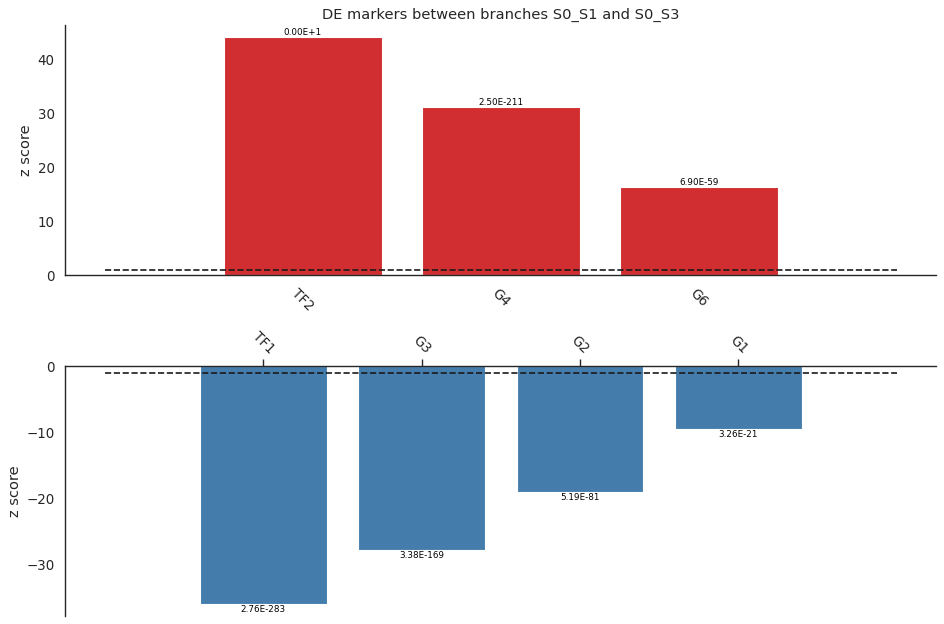

In [36]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

In [37]:
st.detect_markers(
    adata,
    ident='label',
    marker_list=adata.uns['var_genes'],
    cutoff_zscore=1.0,
    cutoff_pvalue=0.01
)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
12 markers are being scanned ...


In [38]:
adata.uns["markers_label"].keys()

dict_keys(['attractor_fixed_point_1', 'attractor_fixed_point_2', 'branch_fixed_point_1', 'branch_fixed_point_2', 'common', 'split'])

In [39]:
for key in adata.uns["markers_label"].keys():
    print(f"Detected population-specific markers for `{key}`")
    print(f"\t{adata.uns['markers_label'][key].index.to_list()}")

Detected population-specific markers for `attractor_fixed_point_1`
	['G3', 'G2', 'G1']
Detected population-specific markers for `attractor_fixed_point_2`
	['G4', 'G6']
Detected population-specific markers for `branch_fixed_point_1`
	[]
Detected population-specific markers for `branch_fixed_point_2`
	[]
Detected population-specific markers for `common`
	['TF3', 'TF4', 'TF5']
Detected population-specific markers for `split`
	[]


#### Save results

In [40]:
st.write(adata,file_name='stream_bifurcation_core_regulation1.pkl')

To read back the saved `.pkl` file
```python
adata = st.read('./stream_result/stream_result.pkl')
```